In [115]:
import re
from gensim.corpora.dictionary import Dictionary
from nltk.tokenize import sent_tokenize
from nltk.tokenize import word_tokenize
from nltk.tokenize import regexp_tokenize
from nltk.tokenize import TweetTokenizer
from gensim.models.tfidfmodel import  TfidfModel
from  collections import Counter
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
from collections import defaultdict
import string_data as st

In [116]:
# importing data from custom module
string = st.stringdata 


### Split my_string on sentence endings and print the result

In [117]:
sentence_endings = r"[.?!]"
print(re.split(sentence_endings, string))

['SCENE 1: [wind] [clop clop clop] \nKING ARTHUR: Whoa there', '  [clop clop clop] \nSOLDIER #1: Halt', '  Who goes there', '\nARTHUR: It is I, Arthur, son of Uther Pendragon, from the castle of Camelot', '  King of the Britons, defeator of the Saxons, sovereign of all England', '\nSOLDIER #1: Pull the other one', '\nARTHUR: I am, ', '', '', '  and this is my trusty servant Patsy', '  We have ridden the length and breadth of the land in search of knights who will join me in my court at Camelot', '  I must speak with your lord and master', '\nSOLDIER #1: What', '  Ridden on a horse', '\nARTHUR: Yes', "\nSOLDIER #1: You're using coconuts", '\nARTHUR: What', "\nSOLDIER #1: You've got two empty halves of coconut and you're bangin' 'em together", '\nARTHUR: So', "  We have ridden since the snows of winter covered this land, through the kingdom of Mercea, through--\nSOLDIER #1: Where'd you get the coconuts", '\nARTHUR: We found them', '\nSOLDIER #1: Found them', '  In Mercea', "  The coconut

### Find all capitalized words in my_string and print the result

In [118]:

capitalized_words = r"[A-Z]\w+"
print(re.findall(capitalized_words, string))

['SCENE', 'KING', 'ARTHUR', 'Whoa', 'SOLDIER', 'Halt', 'Who', 'ARTHUR', 'It', 'Arthur', 'Uther', 'Pendragon', 'Camelot', 'King', 'Britons', 'Saxons', 'England', 'SOLDIER', 'Pull', 'ARTHUR', 'Patsy', 'We', 'Camelot', 'SOLDIER', 'What', 'Ridden', 'ARTHUR', 'Yes', 'SOLDIER', 'You', 'ARTHUR', 'What', 'SOLDIER', 'You', 'ARTHUR', 'So', 'We', 'Mercea', 'SOLDIER', 'Where', 'ARTHUR', 'We', 'SOLDIER', 'Found', 'In', 'Mercea', 'The', 'ARTHUR', 'What', 'SOLDIER', 'Well', 'ARTHUR', 'The', 'SOLDIER', 'Are', 'ARTHUR', 'Not', 'They', 'SOLDIER', 'What', 'ARTHUR', 'It', 'SOLDIER', 'It', 'It', 'ARTHUR', 'Well', 'Will', 'Arthur', 'Court', 'Camelot', 'SOLDIER', 'Listen', 'In', 'ARTHUR', 'Please', 'SOLDIER', 'Am', 'ARTHUR', 'SOLDIER', 'It', 'African', 'SOLDIER', 'Oh', 'African', 'European', 'That', 'SOLDIER', 'Oh', 'ARTHUR', 'Will', 'Camelot', 'SOLDIER', 'But', 'African', 'SOLDIER', 'Oh', 'SOLDIER', 'So', 'SOLDIER', 'Wait', 'Supposing', 'SOLDIER', 'No', 'SOLDIER', 'Well', 'They', 'SOLDIER', 'What', 'SOLDIER

### Split my_string on spaces and print the result

In [119]:

spaces = r"\s+"
print(re.split(spaces, string))

['SCENE', '1:', '[wind]', '[clop', 'clop', 'clop]', 'KING', 'ARTHUR:', 'Whoa', 'there!', '[clop', 'clop', 'clop]', 'SOLDIER', '#1:', 'Halt!', 'Who', 'goes', 'there?', 'ARTHUR:', 'It', 'is', 'I,', 'Arthur,', 'son', 'of', 'Uther', 'Pendragon,', 'from', 'the', 'castle', 'of', 'Camelot.', 'King', 'of', 'the', 'Britons,', 'defeator', 'of', 'the', 'Saxons,', 'sovereign', 'of', 'all', 'England!', 'SOLDIER', '#1:', 'Pull', 'the', 'other', 'one!', 'ARTHUR:', 'I', 'am,', '...', 'and', 'this', 'is', 'my', 'trusty', 'servant', 'Patsy.', 'We', 'have', 'ridden', 'the', 'length', 'and', 'breadth', 'of', 'the', 'land', 'in', 'search', 'of', 'knights', 'who', 'will', 'join', 'me', 'in', 'my', 'court', 'at', 'Camelot.', 'I', 'must', 'speak', 'with', 'your', 'lord', 'and', 'master.', 'SOLDIER', '#1:', 'What?', 'Ridden', 'on', 'a', 'horse?', 'ARTHUR:', 'Yes!', 'SOLDIER', '#1:', "You're", 'using', 'coconuts!', 'ARTHUR:', 'What?', 'SOLDIER', '#1:', "You've", 'got', 'two', 'empty', 'halves', 'of', 'coconut',

### Find all digits in my_string and print the result


In [120]:
digits = r"\d+"
print(re.findall(digits, string))

['1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '2', '1', '2', '1', '2', '1', '2', '1', '2', '1', '2']


### Split scene into sentences: sentences

In [121]:

sentences = sent_tokenize(string)
print(sentences)

['SCENE 1: [wind] [clop clop clop] \nKING ARTHUR: Whoa there!', '[clop clop clop] \nSOLDIER #1: Halt!', 'Who goes there?', 'ARTHUR: It is I, Arthur, son of Uther Pendragon, from the castle of Camelot.', 'King of the Britons, defeator of the Saxons, sovereign of all England!', 'SOLDIER #1: Pull the other one!', 'ARTHUR: I am, ...  and this is my trusty servant Patsy.', 'We have ridden the length and breadth of the land in search of knights who will join me in my court at Camelot.', 'I must speak with your lord and master.', 'SOLDIER #1: What?', 'Ridden on a horse?', 'ARTHUR: Yes!', "SOLDIER #1: You're using coconuts!", 'ARTHUR: What?', "SOLDIER #1: You've got two empty halves of coconut and you're bangin' 'em together.", 'ARTHUR: So?', "We have ridden since the snows of winter covered this land, through the kingdom of Mercea, through--\nSOLDIER #1: Where'd you get the coconuts?", 'ARTHUR: We found them.', 'SOLDIER #1: Found them?', 'In Mercea?', "The coconut's tropical!", 'ARTHUR: What 

### Use word_tokenize to tokenize the fourth sentence: tokenized_sent

In [122]:
tokenized_sent = word_tokenize(sentences[3])


### Make a set of unique tokens in the entire scene: unique_tokens

In [123]:
unique_tokens = set(word_tokenize(string))
print(unique_tokens)


{'house', "'re", 'am', 'and', 'length', 'order', 'does', 'one', 'feathers', 'African', 'That', 'an', 'that', 'migrate', 'in', 'grips', 'Britons', '.', 'Am', 'will', 'use', 'two', 'back', 'he', 'master', 'just', 'Whoa', '?', 'Uther', 'have', 'who', 'the', 'maintain', 'they', 'breadth', 'fly', '1', 'carried', 'tell', 'under', 'from', 'this', '2', 'through', 'five', 'but', 'speak', 'strand', 'these', 'by', 'question', 'maybe', 'its', 'A', 'bird', ':', 'Halt', 'go', 'there', 'But', 'south', 'get', 'at', "'ve", 'husk', 'why', 'England', "'d", 'land', 'horse', 'snows', 'We', 'covered', 'son', 'Patsy', 'court', 'yeah', 'our', 'where', 'point', 'me', 'Oh', 'minute', 'a', 'In', 'They', 'pound', 'swallow', 'guiding', 'kingdom', 'other', 'seek', 'carry', 'needs', 'beat', 'I', 'Wait', 'all', 'Where', 'held', 'your', 'it', 'Will', 'line', 'Mercea', 'wings', 'ridden', 'Found', 'could', 'to', 'ounce', 'servant', '!', 'ask', 'halves', 'Pendragon', 'course', ',', "n't", 'carrying', 'Saxons', 'No', 'bri

### Search for the first occurrence of "coconuts" in string: match

In [124]:
match = re.search("coconuts", string)

# Print the start and end indexes of match
print(match.start(), match.end())

580 588


### regular expression to search for anything in square brackets: pattern1

In [125]:

pattern1 = r"\[.*\]"
# RE.search to find the first text in square brackets
print(re.search(pattern1, string))

<re.Match object; span=(9, 32), match='[wind] [clop clop clop]'>


### finding the script notation at the beginning of the fourth sentence and print it

In [126]:

pattern2 = r"[\w\s]+:"
print(re.match(pattern2, sentences[3]))

<re.Match object; span=(0, 7), match='ARTHUR:'>


### Define a regex pattern to find hashtags: pattern1

In [127]:

pattern1 = r"#\w+"
hashtags = regexp_tokenize(string[0], pattern1)
print(hashtags)

[]


### a pattern that matches both mentions (@) and hashtags

In [128]:

pattern2 = r"([@#]\w+)"

mentions_hashtags = regexp_tokenize(string[-1],pattern2)
print(mentions_hashtags)

[]


### Use the TweetTokenizer to tokenize all tweets into one list

In [129]:
tknzr = TweetTokenizer()
all_tokens = [tknzr.tokenize(t) for t in string]
print(all_tokens)

[['S'], ['C'], ['E'], ['N'], ['E'], [], ['1'], [':'], [], ['['], ['w'], ['i'], ['n'], ['d'], [']'], [], ['['], ['c'], ['l'], ['o'], ['p'], [], ['c'], ['l'], ['o'], ['p'], [], ['c'], ['l'], ['o'], ['p'], [']'], [], [], ['K'], ['I'], ['N'], ['G'], [], ['A'], ['R'], ['T'], ['H'], ['U'], ['R'], [':'], [], ['W'], ['h'], ['o'], ['a'], [], ['t'], ['h'], ['e'], ['r'], ['e'], ['!'], [], [], ['['], ['c'], ['l'], ['o'], ['p'], [], ['c'], ['l'], ['o'], ['p'], [], ['c'], ['l'], ['o'], ['p'], [']'], [], [], ['S'], ['O'], ['L'], ['D'], ['I'], ['E'], ['R'], [], ['#'], ['1'], [':'], [], ['H'], ['a'], ['l'], ['t'], ['!'], [], [], ['W'], ['h'], ['o'], [], ['g'], ['o'], ['e'], ['s'], [], ['t'], ['h'], ['e'], ['r'], ['e'], ['?'], [], ['A'], ['R'], ['T'], ['H'], ['U'], ['R'], [':'], [], ['I'], ['t'], [], ['i'], ['s'], [], ['I'], [','], [], ['A'], ['r'], ['t'], ['h'], ['u'], ['r'], [','], [], ['s'], ['o'], ['n'], [], ['o'], ['f'], [], ['U'], ['t'], ['h'], ['e'], ['r'], [], ['P'], ['e'], ['n'], ['d'], ['r'], 

### Tokenize and print only capital words

In [130]:
capital_words = r"[A-ZÜ]\w+"
print(regexp_tokenize(string, capital_words))

['SCENE', 'KING', 'ARTHUR', 'Whoa', 'SOLDIER', 'Halt', 'Who', 'ARTHUR', 'It', 'Arthur', 'Uther', 'Pendragon', 'Camelot', 'King', 'Britons', 'Saxons', 'England', 'SOLDIER', 'Pull', 'ARTHUR', 'Patsy', 'We', 'Camelot', 'SOLDIER', 'What', 'Ridden', 'ARTHUR', 'Yes', 'SOLDIER', 'You', 'ARTHUR', 'What', 'SOLDIER', 'You', 'ARTHUR', 'So', 'We', 'Mercea', 'SOLDIER', 'Where', 'ARTHUR', 'We', 'SOLDIER', 'Found', 'In', 'Mercea', 'The', 'ARTHUR', 'What', 'SOLDIER', 'Well', 'ARTHUR', 'The', 'SOLDIER', 'Are', 'ARTHUR', 'Not', 'They', 'SOLDIER', 'What', 'ARTHUR', 'It', 'SOLDIER', 'It', 'It', 'ARTHUR', 'Well', 'Will', 'Arthur', 'Court', 'Camelot', 'SOLDIER', 'Listen', 'In', 'ARTHUR', 'Please', 'SOLDIER', 'Am', 'ARTHUR', 'SOLDIER', 'It', 'African', 'SOLDIER', 'Oh', 'African', 'European', 'That', 'SOLDIER', 'Oh', 'ARTHUR', 'Will', 'Camelot', 'SOLDIER', 'But', 'African', 'SOLDIER', 'Oh', 'SOLDIER', 'So', 'SOLDIER', 'Wait', 'Supposing', 'SOLDIER', 'No', 'SOLDIER', 'Well', 'They', 'SOLDIER', 'What', 'SOLDIER

### Tokenize and print only emoji

In [131]:

emoji = "['\U0001F300-\U0001F5FF'|'\U0001F600-\U0001F64F'|'\U0001F680-\U0001F6FF'|'\u2600-\u26FF\u2700-\u27BF']"
print(regexp_tokenize(string, emoji))

["'", "'", "'", "'", "'", "'", "'", "'", "'", "'", "'", "'", "'", "'", "'"]


[6, 5, 4, 25, 4, 40, 5, 1, 4, 1, 14, 18, 6, 3, 8, 4, 6, 29, 5, 7, 6, 7, 29, 21, 21, 1, 3, 4, 8, 15, 6, 14, 10, 2, 12, 9, 10, 10, 7, 3, 0]


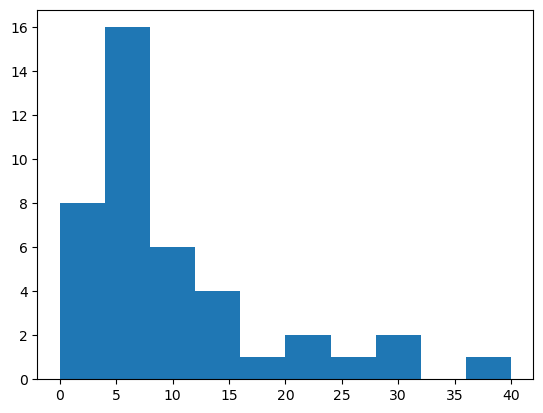

In [132]:
# Split the script into lines: lines
lines = string.split('\n')

# Replace all script lines for speaker
pattern = "[A-Z]{2,}(\s)?(#\d)?([A-Z]{2,})?:"
lines = [re.sub(pattern, '', l) for l in lines]

# Tokenize each line: tokenized_lines
tokenized_lines = [regexp_tokenize(s,'\w+') for s in lines]

# Make a frequency list of lengths: line_num_words
line_num_words = [len(t_line) for t_line in tokenized_lines]
print(line_num_words)
# Plot a histogram of the line lengths
plt.hist(line_num_words)

# Show the plot
plt.show()


### Tokenize the string: tokens

In [133]:
tokens = word_tokenize(string)
print(tokens)

['SCENE', '1', ':', '[', 'wind', ']', '[', 'clop', 'clop', 'clop', ']', 'KING', 'ARTHUR', ':', 'Whoa', 'there', '!', '[', 'clop', 'clop', 'clop', ']', 'SOLDIER', '#', '1', ':', 'Halt', '!', 'Who', 'goes', 'there', '?', 'ARTHUR', ':', 'It', 'is', 'I', ',', 'Arthur', ',', 'son', 'of', 'Uther', 'Pendragon', ',', 'from', 'the', 'castle', 'of', 'Camelot', '.', 'King', 'of', 'the', 'Britons', ',', 'defeator', 'of', 'the', 'Saxons', ',', 'sovereign', 'of', 'all', 'England', '!', 'SOLDIER', '#', '1', ':', 'Pull', 'the', 'other', 'one', '!', 'ARTHUR', ':', 'I', 'am', ',', '...', 'and', 'this', 'is', 'my', 'trusty', 'servant', 'Patsy', '.', 'We', 'have', 'ridden', 'the', 'length', 'and', 'breadth', 'of', 'the', 'land', 'in', 'search', 'of', 'knights', 'who', 'will', 'join', 'me', 'in', 'my', 'court', 'at', 'Camelot', '.', 'I', 'must', 'speak', 'with', 'your', 'lord', 'and', 'master', '.', 'SOLDIER', '#', '1', ':', 'What', '?', 'Ridden', 'on', 'a', 'horse', '?', 'ARTHUR', ':', 'Yes', '!', 'SOLDIE

### Converting the tokens into lowercase: lower_tokens

In [134]:
lower_tokens = [t.lower() for t in tokens]
print(lower_tokens)

['scene', '1', ':', '[', 'wind', ']', '[', 'clop', 'clop', 'clop', ']', 'king', 'arthur', ':', 'whoa', 'there', '!', '[', 'clop', 'clop', 'clop', ']', 'soldier', '#', '1', ':', 'halt', '!', 'who', 'goes', 'there', '?', 'arthur', ':', 'it', 'is', 'i', ',', 'arthur', ',', 'son', 'of', 'uther', 'pendragon', ',', 'from', 'the', 'castle', 'of', 'camelot', '.', 'king', 'of', 'the', 'britons', ',', 'defeator', 'of', 'the', 'saxons', ',', 'sovereign', 'of', 'all', 'england', '!', 'soldier', '#', '1', ':', 'pull', 'the', 'other', 'one', '!', 'arthur', ':', 'i', 'am', ',', '...', 'and', 'this', 'is', 'my', 'trusty', 'servant', 'patsy', '.', 'we', 'have', 'ridden', 'the', 'length', 'and', 'breadth', 'of', 'the', 'land', 'in', 'search', 'of', 'knights', 'who', 'will', 'join', 'me', 'in', 'my', 'court', 'at', 'camelot', '.', 'i', 'must', 'speak', 'with', 'your', 'lord', 'and', 'master', '.', 'soldier', '#', '1', ':', 'what', '?', 'ridden', 'on', 'a', 'horse', '?', 'arthur', ':', 'yes', '!', 'soldie

### Creating a Counter with the lowercase tokens

In [135]:
bow_simple = Counter(lower_tokens)
print(bow_simple.most_common(10))

[(':', 40), ('soldier', 24), ('#', 24), (',', 23), ('1', 19), ('?', 19), ('.', 18), ('arthur', 17), ('!', 17), ('the', 17)]


## Text preprocessing 

In [136]:
from nltk.stem import WordNetLemmatizer

### Retain alphabetic words: alpha_only

In [137]:
alpha_only = [t for t in lower_tokens if t.isalpha()]

### Remove all stop words: no_stops

In [138]:

stopwords1 = stopwords.words('english')
no_stops = [t for t in alpha_only if t not in stopwords1]
print(no_stops)

['scene', 'wind', 'clop', 'clop', 'clop', 'king', 'arthur', 'whoa', 'clop', 'clop', 'clop', 'soldier', 'halt', 'goes', 'arthur', 'arthur', 'son', 'uther', 'pendragon', 'castle', 'camelot', 'king', 'britons', 'defeator', 'saxons', 'sovereign', 'england', 'soldier', 'pull', 'one', 'arthur', 'trusty', 'servant', 'patsy', 'ridden', 'length', 'breadth', 'land', 'search', 'knights', 'join', 'court', 'camelot', 'must', 'speak', 'lord', 'master', 'soldier', 'ridden', 'horse', 'arthur', 'yes', 'soldier', 'using', 'coconuts', 'arthur', 'soldier', 'got', 'two', 'empty', 'halves', 'coconut', 'bangin', 'together', 'arthur', 'ridden', 'since', 'snows', 'winter', 'covered', 'land', 'kingdom', 'mercea', 'soldier', 'get', 'coconuts', 'arthur', 'found', 'soldier', 'found', 'mercea', 'coconut', 'tropical', 'arthur', 'mean', 'soldier', 'well', 'temperate', 'zone', 'arthur', 'swallow', 'may', 'fly', 'south', 'sun', 'house', 'martin', 'plover', 'may', 'seek', 'warmer', 'climes', 'winter', 'yet', 'strangers'

### Instantiate the WordNetLemmatizer

In [139]:
wordnet_lemmatizer = WordNetLemmatizer()

### Lemmatize all tokens into a new list: lemmatized

In [140]:

lemmatized = [wordnet_lemmatizer.lemmatize(t) for t in no_stops]
print(lemmatized)

['scene', 'wind', 'clop', 'clop', 'clop', 'king', 'arthur', 'whoa', 'clop', 'clop', 'clop', 'soldier', 'halt', 'go', 'arthur', 'arthur', 'son', 'uther', 'pendragon', 'castle', 'camelot', 'king', 'briton', 'defeator', 'saxon', 'sovereign', 'england', 'soldier', 'pull', 'one', 'arthur', 'trusty', 'servant', 'patsy', 'ridden', 'length', 'breadth', 'land', 'search', 'knight', 'join', 'court', 'camelot', 'must', 'speak', 'lord', 'master', 'soldier', 'ridden', 'horse', 'arthur', 'yes', 'soldier', 'using', 'coconut', 'arthur', 'soldier', 'got', 'two', 'empty', 'half', 'coconut', 'bangin', 'together', 'arthur', 'ridden', 'since', 'snow', 'winter', 'covered', 'land', 'kingdom', 'mercea', 'soldier', 'get', 'coconut', 'arthur', 'found', 'soldier', 'found', 'mercea', 'coconut', 'tropical', 'arthur', 'mean', 'soldier', 'well', 'temperate', 'zone', 'arthur', 'swallow', 'may', 'fly', 'south', 'sun', 'house', 'martin', 'plover', 'may', 'seek', 'warmer', 'clime', 'winter', 'yet', 'stranger', 'land', 's

In [141]:
data = [ text.split() for text in lemmatized]
print(data)

[['scene'], ['wind'], ['clop'], ['clop'], ['clop'], ['king'], ['arthur'], ['whoa'], ['clop'], ['clop'], ['clop'], ['soldier'], ['halt'], ['go'], ['arthur'], ['arthur'], ['son'], ['uther'], ['pendragon'], ['castle'], ['camelot'], ['king'], ['briton'], ['defeator'], ['saxon'], ['sovereign'], ['england'], ['soldier'], ['pull'], ['one'], ['arthur'], ['trusty'], ['servant'], ['patsy'], ['ridden'], ['length'], ['breadth'], ['land'], ['search'], ['knight'], ['join'], ['court'], ['camelot'], ['must'], ['speak'], ['lord'], ['master'], ['soldier'], ['ridden'], ['horse'], ['arthur'], ['yes'], ['soldier'], ['using'], ['coconut'], ['arthur'], ['soldier'], ['got'], ['two'], ['empty'], ['half'], ['coconut'], ['bangin'], ['together'], ['arthur'], ['ridden'], ['since'], ['snow'], ['winter'], ['covered'], ['land'], ['kingdom'], ['mercea'], ['soldier'], ['get'], ['coconut'], ['arthur'], ['found'], ['soldier'], ['found'], ['mercea'], ['coconut'], ['tropical'], ['arthur'], ['mean'], ['soldier'], ['well'], 

### Create the bag-of-words: bow

In [142]:
bow = Counter(lemmatized)
# Printing the 10 most common tokens
print(bow.most_common(10))

[('soldier', 24), ('arthur', 17), ('clop', 9), ('coconut', 8), ('swallow', 8), ('could', 5), ('camelot', 4), ('well', 4), ('ridden', 3), ('land', 3)]


In [143]:
dictionary = Dictionary(data)
print(dictionary.token2id)

{'scene': 0, 'wind': 1, 'clop': 2, 'king': 3, 'arthur': 4, 'whoa': 5, 'soldier': 6, 'halt': 7, 'go': 8, 'son': 9, 'uther': 10, 'pendragon': 11, 'castle': 12, 'camelot': 13, 'briton': 14, 'defeator': 15, 'saxon': 16, 'sovereign': 17, 'england': 18, 'pull': 19, 'one': 20, 'trusty': 21, 'servant': 22, 'patsy': 23, 'ridden': 24, 'length': 25, 'breadth': 26, 'land': 27, 'search': 28, 'knight': 29, 'join': 30, 'court': 31, 'must': 32, 'speak': 33, 'lord': 34, 'master': 35, 'horse': 36, 'yes': 37, 'using': 38, 'coconut': 39, 'got': 40, 'two': 41, 'empty': 42, 'half': 43, 'bangin': 44, 'together': 45, 'since': 46, 'snow': 47, 'winter': 48, 'covered': 49, 'kingdom': 50, 'mercea': 51, 'get': 52, 'found': 53, 'tropical': 54, 'mean': 55, 'well': 56, 'temperate': 57, 'zone': 58, 'swallow': 59, 'may': 60, 'fly': 61, 'south': 62, 'sun': 63, 'house': 64, 'martin': 65, 'plover': 66, 'seek': 67, 'warmer': 68, 'clime': 69, 'yet': 70, 'stranger': 71, 'suggesting': 72, 'migrate': 73, 'could': 74, 'carried'

In [144]:
print(dictionary.get(16))

saxon


In [145]:
#Converts the document from its raw text format into a numerical representation suitable for machine learning algorithms.
corpus = [dictionary.doc2bow(text) for text in data]
# Print the first 10 word ids with their frequency counts from the fifth document
print(corpus)

[[(0, 1)], [(1, 1)], [(2, 1)], [(2, 1)], [(2, 1)], [(3, 1)], [(4, 1)], [(5, 1)], [(2, 1)], [(2, 1)], [(2, 1)], [(6, 1)], [(7, 1)], [(8, 1)], [(4, 1)], [(4, 1)], [(9, 1)], [(10, 1)], [(11, 1)], [(12, 1)], [(13, 1)], [(3, 1)], [(14, 1)], [(15, 1)], [(16, 1)], [(17, 1)], [(18, 1)], [(6, 1)], [(19, 1)], [(20, 1)], [(4, 1)], [(21, 1)], [(22, 1)], [(23, 1)], [(24, 1)], [(25, 1)], [(26, 1)], [(27, 1)], [(28, 1)], [(29, 1)], [(30, 1)], [(31, 1)], [(13, 1)], [(32, 1)], [(33, 1)], [(34, 1)], [(35, 1)], [(6, 1)], [(24, 1)], [(36, 1)], [(4, 1)], [(37, 1)], [(6, 1)], [(38, 1)], [(39, 1)], [(4, 1)], [(6, 1)], [(40, 1)], [(41, 1)], [(42, 1)], [(43, 1)], [(39, 1)], [(44, 1)], [(45, 1)], [(4, 1)], [(24, 1)], [(46, 1)], [(47, 1)], [(48, 1)], [(49, 1)], [(27, 1)], [(50, 1)], [(51, 1)], [(6, 1)], [(52, 1)], [(39, 1)], [(4, 1)], [(53, 1)], [(6, 1)], [(53, 1)], [(51, 1)], [(39, 1)], [(54, 1)], [(4, 1)], [(55, 1)], [(6, 1)], [(56, 1)], [(57, 1)], [(58, 1)], [(4, 1)], [(59, 1)], [(60, 1)], [(61, 1)], [(62, 1)

In [146]:
tfidf = TfidfModel(corpus)
tfidf[corpus[8]]

[(2, 1.0)]

## Named Entity Recognition 

### Tokenize each sentence into words: token_sentences

In [147]:
import nltk

token_sentences = [nltk.word_tokenize(sent) for sent in sentences]


### Tag each tokenized sentence into parts of speech: pos_sentences

In [148]:
pos_sentences = [nltk.pos_tag(sent) for sent in token_sentences] 

### Create the named entity chunks: chunked_sentences

In [149]:
chunked_sentences = nltk.ne_chunk_sents(pos_sentences, binary=True)


### Test for stems of the tree with 'NE' tags

In [150]:

for sent in chunked_sentences:
    for chunk in sent:
        if hasattr(chunk, "label") and chunk.label() == "NE":
            print(chunk)

(NE SCENE/NN)
(NE ARTHUR/NN)
(NE Arthur/NNP)
(NE Uther/NNP Pendragon/NNP)
(NE Camelot/NNP)
(NE Britons/NNP)
(NE Saxons/NNP)
(NE SOLDIER/NNP)
(NE ARTHUR/NNP)
(NE Camelot/NNP)
(NE SOLDIER/NNP)
(NE Ridden/NNP)
(NE ARTHUR/NNP)
(NE SOLDIER/NNP)
(NE ARTHUR/NN)
(NE SOLDIER/NNP)
(NE ARTHUR/NNP)
(NE Mercea/NNP)
(NE SOLDIER/NNP)
(NE Mercea/NNP)
(NE ARTHUR/NN)
(NE SOLDIER/NNP)
(NE ARTHUR/NN)
(NE SOLDIER/NNP)
(NE ARTHUR/NNP)
(NE SOLDIER/NNP)
(NE ARTHUR/NN)
(NE SOLDIER/NNP)
(NE ARTHUR/NN)
(NE Arthur/NNP)
(NE Camelot/NNP)
(NE SOLDIER/NNP)
(NE ARTHUR/NNP)
(NE SOLDIER/NNP)
(NE ARTHUR/NNP)
(NE SOLDIER/NNP)
(NE African/JJ)
(NE SOLDIER/NNP)
(NE African/JJ)
(NE European/JJ)
(NE SOLDIER/NNP)
(NE ARTHUR/NNP)
(NE Camelot/NNP)
(NE SOLDIER/NNP)
(NE SOLDIER/NNP)
(NE SOLDIER/NNP)
(NE SOLDIER/NNP)
(NE SOLDIER/NNP)
(NE SOLDIER/NNP)
(NE SOLDIER/NNP)


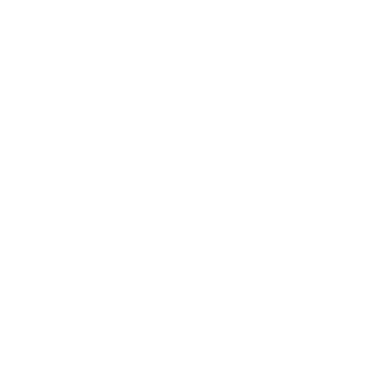

In [151]:

ner_categories = defaultdict(int)

# Create the nested for loop
for sent in chunked_sentences:
    for chunk in sent:
        if hasattr(chunk, 'label'):
            ner_categories[chunk.label()] += 1


labels = list(ner_categories.keys())


values = [ner_categories.get(v) for v in labels]


plt.pie(values, labels=labels, autopct='%1.1f%%', startangle=140)


plt.show()

## Spacy

In [154]:
import spacy

### Instantiate the English model: nlp

In [157]:
nlp = spacy.load('en_core_web_sm', disable=['tagger', 'parser', 'matcher'])

In [161]:
doc = nlp(string)

### Print all of the found entities and their labels

In [162]:
for ent in doc.ents:
    print(ent.label_,ent.text)

PERSON clop clop clop
ORG ARTHUR
PERSON Arthur
ORG Pendragon
ORG Camelot
ORG Saxons
GPE England
ORG ARTHUR
PERSON Patsy
ORG Camelot
GPE Ridden
ORG ARTHUR
ORG ARTHUR
CARDINAL two
CARDINAL halves
ORG ARTHUR
DATE winter
ORG ARTHUR
PERSON Mercea
ORG ARTHUR
ORG ARTHUR
PERSON martin
DATE winter
ORG ARTHUR
ORG ARTHUR
CARDINAL one
ORG ARTHUR
PERSON Arthur
ORG the Court of Camelot
CARDINAL forty-three
ORG ARTHUR
ORG ARTHUR
NORP African
NORP African
NORP European
ORG ARTHUR
ORG Camelot
NORP African
PERSON clop clop clop
CARDINAL two
